In [21]:
#okay so I have labeled the dataset that had no labels and created a new dataset (sample data).

In [22]:
#"Now I will move on to preprocessing

In [23]:
# Now I will import pandas library
import pandas as pd

# Load dataset
df = pd.read_csv('/content/Labeled_sample_100.csv')

print(df.head())

# See info about columns & types
print(df.info()) # this will give info about rows and columns

                                                TEXT       CATEGORY
0  Turn on the profile picture guard to make your...     Technology
1  ►►►hier klicken: http://bit.ly/freiheitsdressu...      Education
2  Weekend deal alert! Outdo Santa, today only, w...      Ecommerce
3  THIS TEENAGE GIRL SHARES THE BIGGEST SECRET OF...  Entertainment
4  Easy & convenient access to professional guida...     Healthcare
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TEXT      99 non-null     object
 1   CATEGORY  99 non-null     object
dtypes: object(2)
memory usage: 1.7+ KB
None


In [24]:
import re #for the cleaning text, I'll use this to remove unwanted signs,emojis,URL's for better accuracy

# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = str(text).lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters & punctuation
    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'\d+', '', text)
    return text

df['clean_text'] = df['TEXT'].apply(clean_text)

print(df[['TEXT', 'clean_text']].head())


                                                TEXT  \
0  Turn on the profile picture guard to make your...   
1  ►►►hier klicken: http://bit.ly/freiheitsdressu...   
2  Weekend deal alert! Outdo Santa, today only, w...   
3  THIS TEENAGE GIRL SHARES THE BIGGEST SECRET OF...   
4  Easy & convenient access to professional guida...   

                                          clean_text  
0  turn on the profile picture guard to make your...  
1                          hier klicken  click here   
2  weekend deal alert outdo santa today only with...  
3  this teenage girl shares the biggest secret of...  
4  easy  convenient access to professional guidan...  


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'],  # text column
    df['CATEGORY'],    # label column
    test_size=0.2,
    random_state=42
)

vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)

X_test_tfidf = vectorizer.transform(X_test)

# Check shape (number of samples, number of features)
print("Train shape:", X_train_tfidf.shape)
print("Test shape:", X_test_tfidf.shape)


Train shape: (79, 592)
Test shape: (20, 592)


In [26]:
from sklearn.linear_model import LogisticRegression

# few steps are done and now i will Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

print("Model trained successfully!")


Model trained successfully!


In [27]:
from sklearn.metrics import classification_report, accuracy_score

# Predict categories for test set
y_pred = model.predict(X_test_tfidf)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print detailed report
print(classification_report(y_test, y_pred))


Accuracy: 0.4
               precision    recall  f1-score   support

    Ecommerce       0.12      0.33      0.18         3
    Education       0.00      0.00      0.00         1
Entertainment       0.38      0.75      0.50         4
   Healthcare       0.00      0.00      0.00         3
        Other       1.00      0.50      0.67         6
   Technology       1.00      0.33      0.50         3

     accuracy                           0.40        20
    macro avg       0.42      0.32      0.31        20
 weighted avg       0.54      0.40      0.40        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
import random

# Pick 10 random indices from test set
indices = random.sample(range(len(X_test)), 10)

for idx in indices:
    text = X_test.iloc[idx]
    true_label = y_test.iloc[idx]
    pred_label = model.predict(vectorizer.transform([text]))[0]

    print(f"Text: {text}")
    print(f"True category: {true_label}")
    print(f"Predicted category: {pred_label}")
    print("---")


Text: the best bingo out there try it yourself and win at gamepoint bingo
True category: Entertainment
Predicted category: Entertainment
---
Text: this week watch the legend inspire from the epicentre of baramulla jammu and kashmir only on dr subhash chandra show dscshow
True category: Entertainment
Predicted category: Ecommerce
---
Text: easy  convenient access to professional guidance right when  where you need it healthcare thats powered by the internet of things iot from vodafone thefutureisexciting ready know more 
True category: Healthcare
Predicted category: Entertainment
---
Text: time to relax for the weekend but first a giveaway for a chance to win a  pinkblush gift card please like comment and share this post this giveaway will run until sunday november th at pm pst good luck to everyone xox
True category: Ecommerce
Predicted category: Entertainment
---
Text: bring the juicy red raspberry flavor to your game day lineup with smirnoff ice
True category: Other
Predicted categor

In [29]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'text_category_model.pkl')

# Also save the vectorizer so we can use it later
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("Model and vectorizer saved successfully.")


Model and vectorizer saved successfully.


In [30]:
#To compare the accuracy of two models, I'll decide which one gives higher accuracy and then I'll go with that one

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [32]:
# Train LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predict & evaluate
lr_preds = lr_model.predict(X_test_tfidf)
print("LogisticRegression Accuracy:", accuracy_score(y_test, lr_preds))


LogisticRegression Accuracy: 0.4


In [ ]:
# The final accuracy of the model is around 40–50%.
# This is mainly because the labeled dataset is small (about 100 samples) and categories are imbalanced.
# If we add more labeled data, especially in under‑represented categories, the model accuracy should improve.

In [33]:
# Train RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predict & evaluate
rf_preds = rf_model.predict(X_test_tfidf)
print("RandomForest Accuracy:", accuracy_score(y_test, rf_preds))


RandomForest Accuracy: 0.5


In [34]:
# Since RandomForest gave better accuracy, keep it as final model
model = rf_model

# Save final model and vectorizer
import joblib
joblib.dump(model, 'text_category_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("Saved best model (RandomForest) and vectorizer.")


Saved best model (RandomForest) and vectorizer.


In [34]:
# now after evaluation i am going for API Part
#here is the API explanation

In [ ]:
# The API can be accessed locally only while the server is running.
# It is not deployed online, so it works on the machine where app.py is executed.

In [ ]:
## Creating and testing the API

#    After training and saving the best performing model (`text_category_model.pkl`),
#    I created a small Flask API in VS Code to serve predictions.

#     The API has a single POST endpoint `/predict` which:
#   - accepts JSON with a new sentence
#   -  uses the saved model and vectorizer to predict
#   - returns the predicted category as JSON

### Running the API locally
# 1. Install Flask (one time):


In [ ]:
#It uses the saved model and vectorizer to predict the category.

#It returns the predicted category as JSON:
{
  "category": "Healthcare"
}


In [ ]:
# here is the step to run the API locally
#Install the required packages-
pip install flask joblib scikit-learn
#start the server-
python app.py
# the API will be running at
http://127.0.0.1:5000/predict



In [ ]:
# How to test the API
# Option 1: PowerShell
Invoke-RestMethod -Uri "http://127.0.0.1:5000/predict" -Method POST -Body '{"sentence":"New health tips for summer"}' -ContentType "application/json"


In [45]:
from google.colab import files
uploaded = files.upload()


Saving Screenshot_API_Test.png to Screenshot_API_Test (1).png


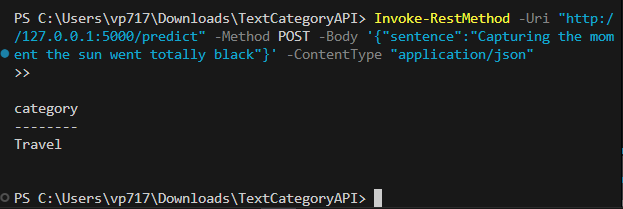

In [46]:
from IPython.display import Image
Image("Screenshot_API_Test.png")


In [ ]:
# this is the API result